<h3>Comparision of ANN and CNN over MNIST Dataset</h3>
<h5>This is the original dataset with **60/10 split**</h5>
<h5>The results are at the end of the notebook</h5>

In [25]:
#import packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.datasets import mnist

import matplotlib.pyplot as plt
import pandas as pd

<h1>ANN Model</h1>

In [26]:
#load mnist dataset
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('images in train dataset : {}'.format(xtrain.shape))
print('images in test dataset  : {}'.format(xtest.shape))

images in train dataset : (60000, 28, 28)
images in test dataset  : (10000, 28, 28)


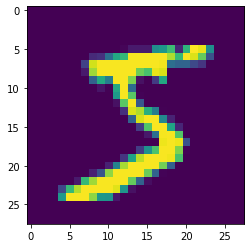

In [27]:
plt.imshow(xtrain[0])

In [28]:
#preprocessing
num_pixels = xtrain.shape[1]*xtrain.shape[2]

xtrain_ann = xtrain.reshape(xtrain.shape[0], num_pixels).astype('float32')
xtest_ann = xtest.reshape(xtest.shape[0], num_pixels).astype('float32')
print('new shape in train dataset : {}'.format(xtrain_ann.shape))
print('new shape in test dataset  : {}'.format(xtest_ann.shape))

new shape in train dataset : (60000, 784)
new shape in test dataset  : (10000, 784)


In [29]:
xtrain_ann = xtrain_ann/255.0
xtest_ann = xtest_ann/255.0

ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

num_classes = ytest.shape[1]
print('shape of output : {}'.format(num_classes))

shape of output : 10


In [30]:
#create model
def classificationModelANN():
  model = Sequential()
  model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='relu'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [31]:
#fit model, evaluate model
modelANN = classificationModelANN()

annhist = modelANN.fit(xtrain_ann, ytrain, validation_data = (xtest_ann, ytest), epochs = 10, verbose = 1)

scoreANN = modelANN.evaluate(xtest_ann, ytest, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/step - loss: 2.5655 - accuracy: 0.6466 - val_loss: 2.2893 - val_accuracy: 0.7846
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 2.2030 - accuracy: 0.7602 - val_loss: 1.9907 - val_accuracy: 0.8243
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 2.1357 - accuracy: 0.7688 - val_loss: 2.0026 - val_accuracy: 0.8311
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 2.3560 - accuracy: 0.6470 - val_loss: 2.5331 - val_accuracy: 0.4794
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 2.1430 - accuracy: 0.7997 - val_loss: 1.9616 - val_accuracy: 0.8412
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 2.0466 - accuracy: 0.7947 - val_loss: 2.3947 - val_accuracy: 0.4229
Epoch 7/10
60000/60000 [==============================] - 6s 1

In [32]:
print('Accuracy: {}%'.format(round(scoreANN[1],3)))

Accuracy: 0.851%


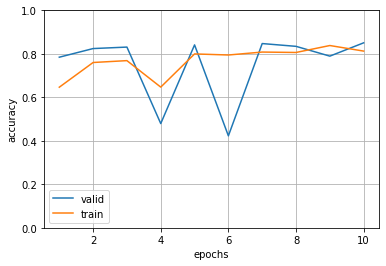

In [37]:
#plot acuuracy graph
plt.plot(range(1,11), annhist.history['val_accuracy'], label='valid')
plt.plot(range(1,11), annhist.history['accuracy'], label='train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

<h1>CNN Model</h1>

In [38]:
#load packages
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.layers import Flatten

In [39]:
#preprocessing
xtrain_cnn = xtrain.reshape(xtrain2.shape[0], 28, 28, 1).astype('float32')
xtest_cnn = xtest.reshape(xtest2.shape[0], 28, 28, 1).astype('float32')

xtrain_cnn = xtrain_cnn/255
xtest_cnn = xtest_cnn/255

#ytest, ytrain is same for ann and cnn

In [40]:
#create model
def classificationModelCNN():
  model = Sequential()
  model.add(Conv2D(16, (4,4), strides=(1,1), activation ='relu', input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Conv2D(32, (4,4), strides=(1,1), activation ='relu', input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  
  model.add(Flatten())

  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

In [41]:
#fit model, evaluate model
modelCNN = classificationModelCNN()

cnnhist = modelCNN.fit(
    xtrain_cnn,
    ytrain,
    validation_data = (xtest_cnn, ytest),
    epochs = 10,
    verbose = 1
)

scoreCNN = modelCNN.evaluate(xtest_cnn, ytest, verbose = 0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.1617 - accuracy: 0.9507 - val_loss: 0.0623 - val_accuracy: 0.9796
Epoch 2/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0370 - accuracy: 0.9881 - val_loss: 0.0371 - val_accuracy: 0.9879
Epoch 4/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0288 - accuracy: 0.9904 - val_loss: 0.0350 - val_accuracy: 0.9880
Epoch 5/10
60000/60000 [==============================] - 8s 142us/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0357 - val_accuracy: 0.9891
Epoch 6/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0320 - val_accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 8s 1

In [42]:
print('Accuracy: {}%'.format(round(scoreCNN[1],5)))  

Accuracy: 0.9902%


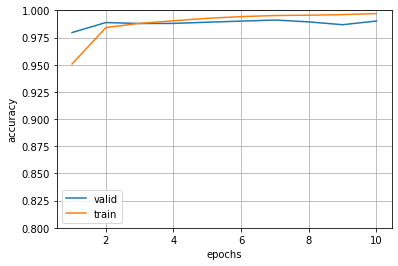

In [44]:
#plot accuracy graph
plt.plot(range(1,11), cnnhist.history['val_accuracy'], label='valid')
plt.plot(range(1,11), cnnhist.history['accuracy'], label='train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0.8,1)
plt.grid()
plt.legend()
plt.show()

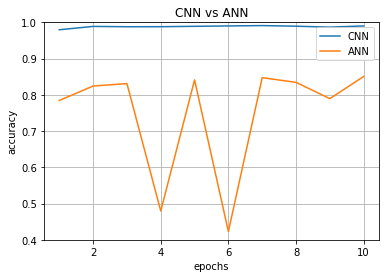

In [46]:
#plot ann vs cnn over validation accuracy
plt.plot(range(1,11), cnnhist.history['val_accuracy'], label='CNN')
plt.plot(range(1,11), annhist.history['val_accuracy'], label='ANN')
plt.title('CNN vs ANN')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0.4,1)
plt.grid()
plt.legend()
plt.show()

In [48]:
print('ANN Accuracy : {}'.format(round(scoreANN[1]*100,5)))
print('CNN Accuracy : {}'.format(round(scoreCNN[1]*100,5)))

ANN Accuracy : 85.07
CNN Accuracy : 99.02
